# Trabajo Práctico 3: Clustering
Para la materia: Topicos avanzados en minería de datos - C2 2024

**Alumno:** [Joaquin Caporalini](mailto:joaquicaporalini@gmail.com)

**Docente:** [Pablo Granitto](mailto:granitto@cifasis-conicet.gov.ar)

## Carga de datos y librerías

Para trabajar a lo largo del trabajo voy a cargar los datos y las librerías.

Los datos vienen empaquetados

In [2]:
library(e1071)
library(randomForest)
library(xgboost)

In [3]:
# Carga de datos
#   - diag_test
#   - diag_train
#   - esp_test
#   - esp_train
#   - RRL
load("./Pablo/TP4.Rdata")

# Cargo datos de lampone
load("./Pablo/lampone.Rdata")

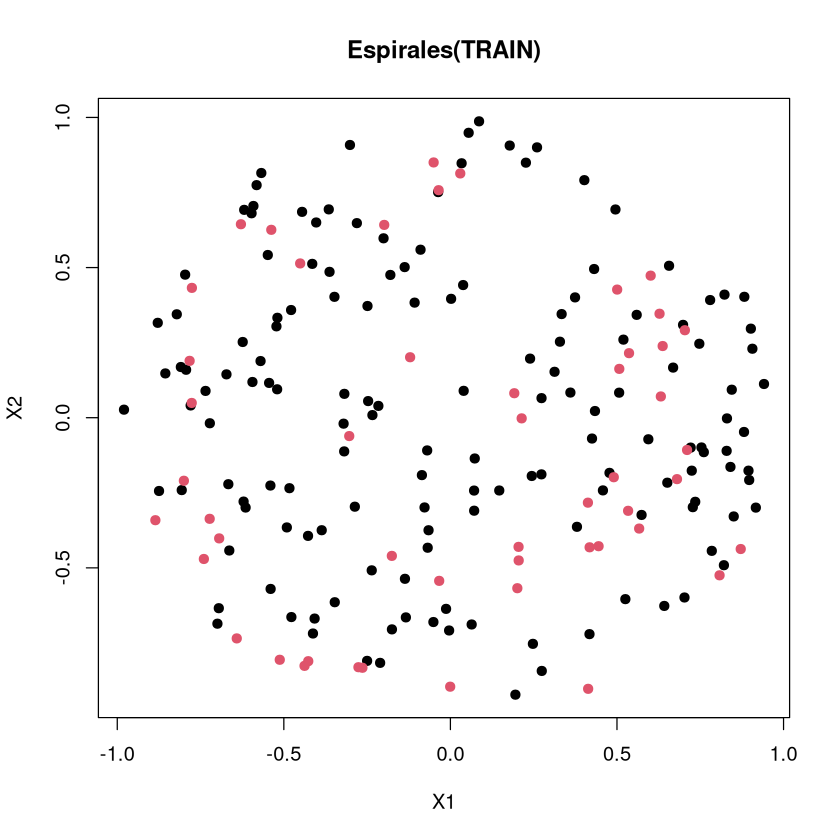

Frecuencias de clases en diag_train



  0   1 
150 150 

Frecuencias de clases en esp_train



  0   1 
100 100 

       V1                 V2           class  
 Min.   :-3.58972   Min.   :-4.28343   0:150  
 1st Qu.:-1.01963   1st Qu.:-1.22679   1:150  
 Median :-0.05422   Median :-0.06128          
 Mean   : 0.02342   Mean   :-0.10019          
 3rd Qu.: 1.09635   3rd Qu.: 1.01698          
 Max.   : 4.31223   Max.   : 5.45912          

       x                  y            class  
 Min.   :-0.97977   Min.   :-0.92231   0:100  
 1st Qu.:-0.45756   1st Qu.:-0.37051   1:100  
 Median :-0.03451   Median :-0.01910          
 Mean   : 0.01184   Mean   :-0.01731          
 3rd Qu.: 0.49672   3rd Qu.: 0.34547          
 Max.   : 0.94133   Max.   : 0.98707          

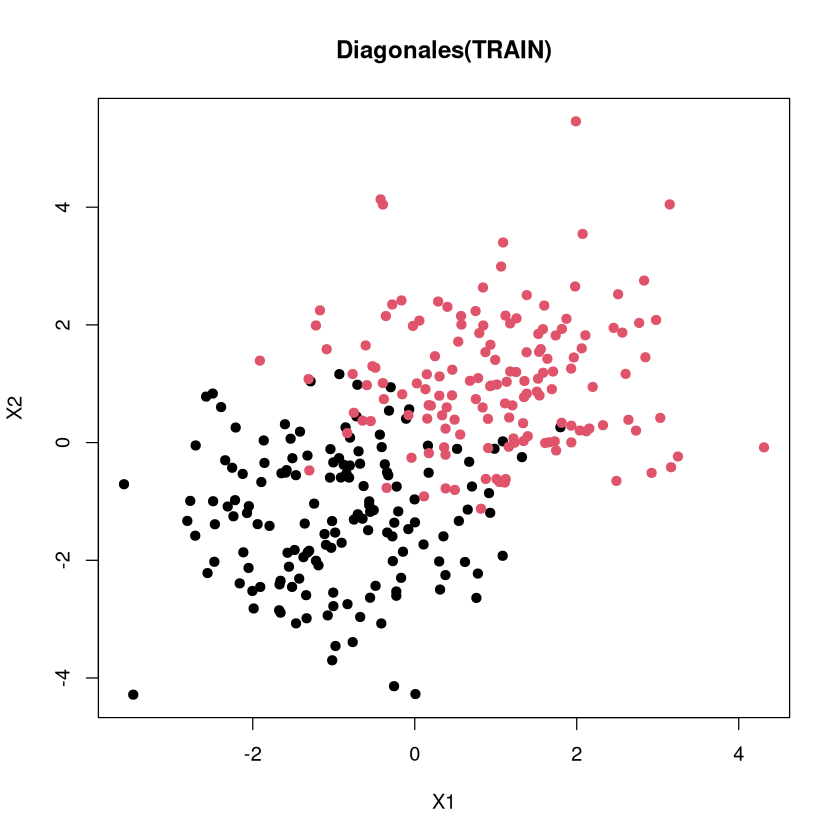

In [4]:
plot(x=esp_train[,1], y=esp_train[,2], col=diag_train[,3], pch=19, xlab="X1", ylab="X2", main="Espirales(TRAIN)")
plot(x=diag_train[,1], y=diag_train[,2], col=diag_train[,3], pch=19, xlab="X1", ylab="X2", main="Diagonales(TRAIN)")

cat("Frecuencias de clases en diag_train\n")
table(diag_train[,3])
cat("Frecuencias de clases en esp_train\n")
table(esp_train[,3])

summary(diag_train)
summary(esp_train)

## 1. Boosting

In [30]:
efecto_complejidad <- function(train, test, title="") {
    x.train<-as.matrix(train[,1:2])
    y.train<-train[,3]

    error.test  <- numeric(20)
    error.train <- numeric(20)
    
    XGB.nrounds=200 #total de arboles/ciclos
    XGB.eta=0.1     #learning rate, similar a redes
    
    x.test <- as.matrix(test[, 1:2])
    y.test <- test[, 3]
    
    for (profundidad in 1:20) {
        
        XGB.max.depth=profundidad #profundidad maxima de los arboles, complejidad
        m.xgb <- xgboost(data=x.train, label=as.integer(y.train)-1, objective="binary:hinge", nrounds=XGB.nrounds,
        early_stopping_rounds=1000, eta=XGB.eta, max.depth=XGB.max.depth, colsample_bytree=1, verbose=0,
        subsample=1)

        # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
        y.pred.test  <- predict(m.xgb, x.test)
        y.pred.train <- predict(m.xgb, x.train)

        # Calcula la tasa de error (porcentaje de predicciones incorrectas)
        error.test[profundidad]  <- mean(y.pred.test != as.integer(y.test)-1)
        error.train[profundidad] <- mean(y.pred.train != as.integer(y.train)-1)
    }
    # Crear el gráfico base con el primer conjunto
    plot(1:20, error.test, type = "b", col = "blue", lwd = 2, pch=16, 
     xlab = "Profundidad", ylab = "Tasa de error", main = paste("Efecto de la complejidad", title),
     ylim = c(min(c(error.test, error.train)), 1))

    # Agregar el segundo conjunto al gráfico
    lines(1:20, error.train, type="b", col = "red", lwd = 2, pch = 16)

    legend("topleft", legend = c("Test", "Train"), 
       col = c("blue", "red"), lwd = 2, cex = 0.8)

    cat("El error sobre test mínimo es ", min(error.test), " con profundidad ", which.min(error.test), "\n")
}


El error sobre test mínimo es  0.3516  con profundidad  5 


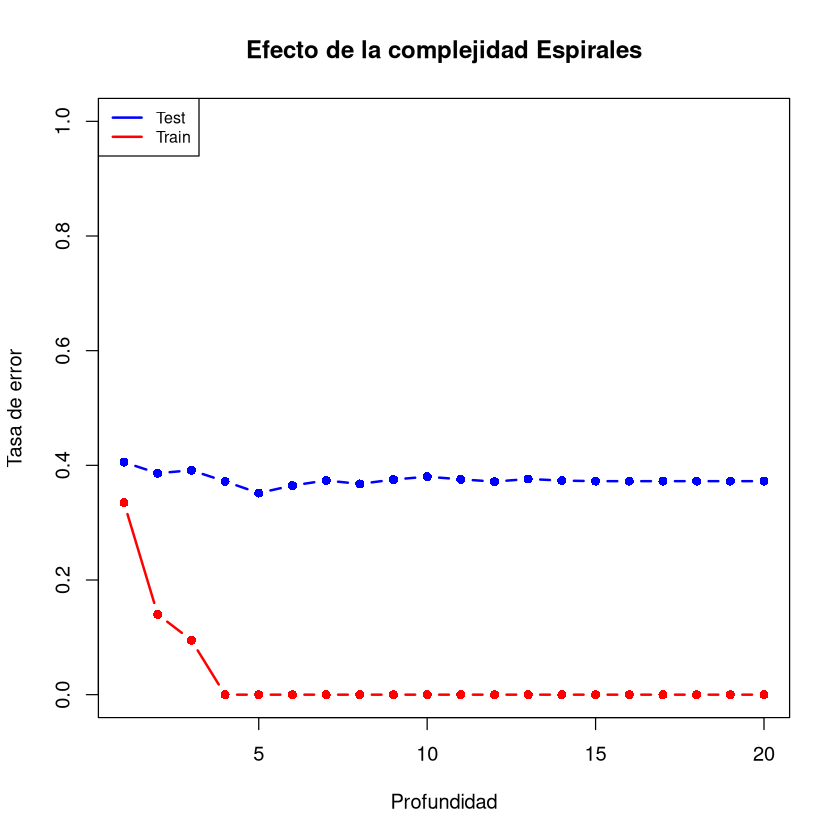

In [31]:
efecto_complejidad(esp_train, esp_test, "Espirales")

El error sobre test mínimo es  0.1155  con profundidad  1 


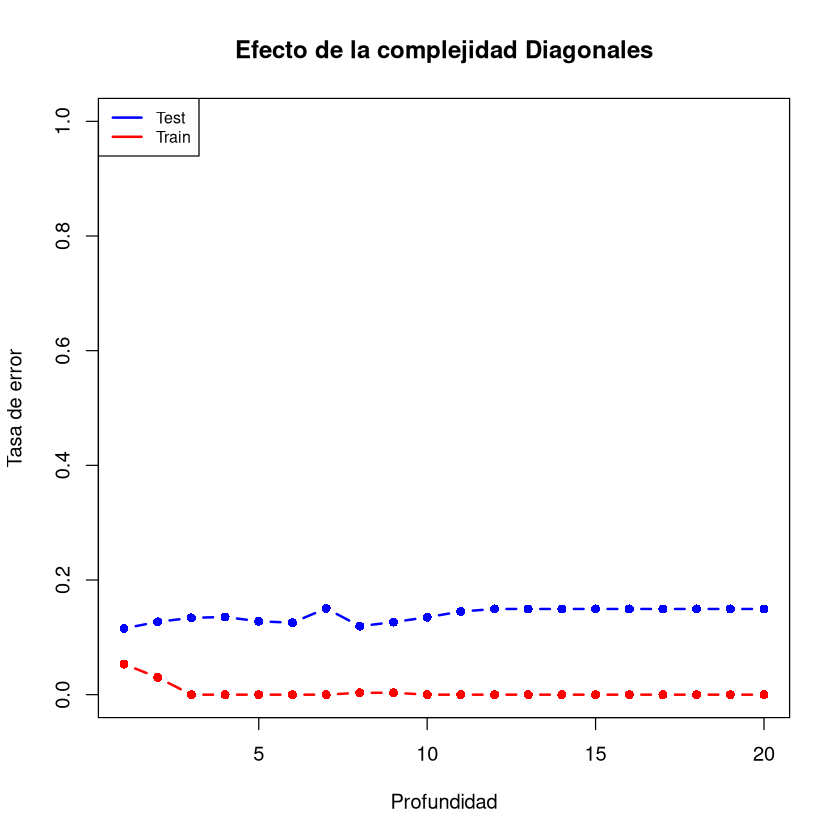

In [33]:
efecto_complejidad(diag_train, diag_test, "Diagonales")

### Conclusiones
Para el caso de las **espirales** el error mínimo es con profundidad 5 y un error de *0.3516*. Mientras el error para el caso de las **diagonales** es de 0.1155 obtenido con profundidad 1.

## 2. Random Forest

In [15]:
RRL

Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,⋯,c89_m4,cnt,n09_c3,n09_hk_color,n09_jh_color,n09_jk_color,n09_m2,n09_m4,ppmb,Tipo
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.12125,0.6320207,1,0.28358209,2.696911e+01,-2.053218e-08,5.948271e-01,0.000000000,1363382.6,0.21739130,⋯,15.60932,67,3.322270e-01,-1.150879e-02,3.124268e-01,0.3009180,15.73283,15.74282,0.209575117,0
0.11900,0.6567491,1,0.27941176,2.734302e+01,3.789182e-09,5.949201e-01,0.000000000,1134045.3,0.10576923,⋯,15.79620,68,2.538926e-01,5.294659e-02,3.438380e-01,0.3967845,15.92177,15.93016,0.006674408,0
0.28200,1.0000000,1,0.23188406,3.817291e+03,-4.223939e+00,3.960514e-03,0.000000000,2425723.6,0.05839416,⋯,14.43619,69,2.392369e-01,7.562047e-02,3.703775e-01,0.4459980,14.57444,14.58119,0.166880861,0
0.04375,0.9999802,1,0.18181818,2.308996e+01,-2.235318e-02,5.958192e-01,0.000000000,677993.1,0.21311475,⋯,13.21403,66,2.702403e-01,1.058040e-01,4.507252e-01,0.5565292,13.34951,13.35817,0.528596205,0
0.33000,0.4083999,1,0.29545455,2.773315e+01,3.789182e-09,5.949201e-01,0.000000000,824000203.6,0.16428571,⋯,-12683.95082,132,2.718148e+04,-1.001544e+04,1.001586e+04,0.4185631,-9999.60320,-9158.22601,0.104860550,0
0.23450,0.4528910,1,0.32885906,2.732995e+01,4.427833e-09,5.951918e-01,0.000000000,195875889.9,0.18137255,⋯,15.21148,149,3.472547e-01,9.518029e-02,5.111292e-01,0.6063095,15.42667,15.43705,2.093833499,0
0.02400,0.5741356,1,0.28225806,2.259639e+01,-8.089852e-10,5.951714e-01,0.000000000,332778492.6,0.21052632,⋯,12.65522,124,3.258312e-01,1.077733e-01,5.124180e-01,0.6201913,12.86723,12.87655,0.213572728,0
0.19250,0.2018889,1,0.32323232,2.729853e+01,3.150531e-09,5.946484e-01,0.000000000,1443838751.8,0.14367816,⋯,15.73541,99,4.260648e-01,-1.155436e-01,2.266564e-01,0.1111128,15.85809,15.87059,1.972334480,0
0.11500,1.0000000,1,0.19650655,3.496612e+01,-3.187687e-02,4.252185e-01,0.000000000,242547578.2,0.13375796,⋯,14.11820,229,1.160913e-01,1.686677e-01,4.860777e-01,0.6547454,14.32627,14.32469,0.016174758,0


In [16]:
reps <- 5
iters <- c(1, 2, 4, 8, 17, 34, 69) # de forma iterativa divido la cantidad de features
nroArboles <- 1000

error <- matrix(0, nrow = reps, ncol = length(iters))

for (i in 1:length(iters)) {

    features <- iters[i]
    error.i  <- numeric(reps) 

    for (j in 1:reps){
        
        
        m.rf <- randomForest(Tipo ~ ., data=RRL, ntree=nroArboles, mtry=features)
        
        # Error de Out of Bag, luego de construir todos los árboles
        # usando datos que no se utilizaron para entrenar un árbol específico
        error.i[j] <- m.rf$err.rate[nrow(m.rf$err.rate), "OOB"]
    }

    error[,i] <- error.i
}

error <- as.data.frame(error)
colnames(error) <- iters

       1                 2                 4                 8          
 Min.   :0.04490   Min.   :0.04136   Min.   :0.03966   Min.   :0.03924  
 1st Qu.:0.04547   1st Qu.:0.04136   1st Qu.:0.03994   1st Qu.:0.03924  
 Median :0.04547   Median :0.04150   Median :0.04008   Median :0.03952  
 Mean   :0.04572   Mean   :0.04156   Mean   :0.03997   Mean   :0.03963  
 3rd Qu.:0.04618   3rd Qu.:0.04164   3rd Qu.:0.04008   3rd Qu.:0.03966  
 Max.   :0.04660   Max.   :0.04193   Max.   :0.04008   Max.   :0.04051  
       17                34                69         
 Min.   :0.03867   Min.   :0.03853   Min.   :0.04178  
 1st Qu.:0.03867   1st Qu.:0.03881   1st Qu.:0.04207  
 Median :0.03881   Median :0.03881   Median :0.04221  
 Mean   :0.03892   Mean   :0.03887   Mean   :0.04246  
 3rd Qu.:0.03909   3rd Qu.:0.03881   3rd Qu.:0.04263  
 Max.   :0.03938   Max.   :0.03938   Max.   :0.04363  

0.04572238 0.04155807 0.03997167 0.03963173 0.03892351 0.03886686 0.04246459

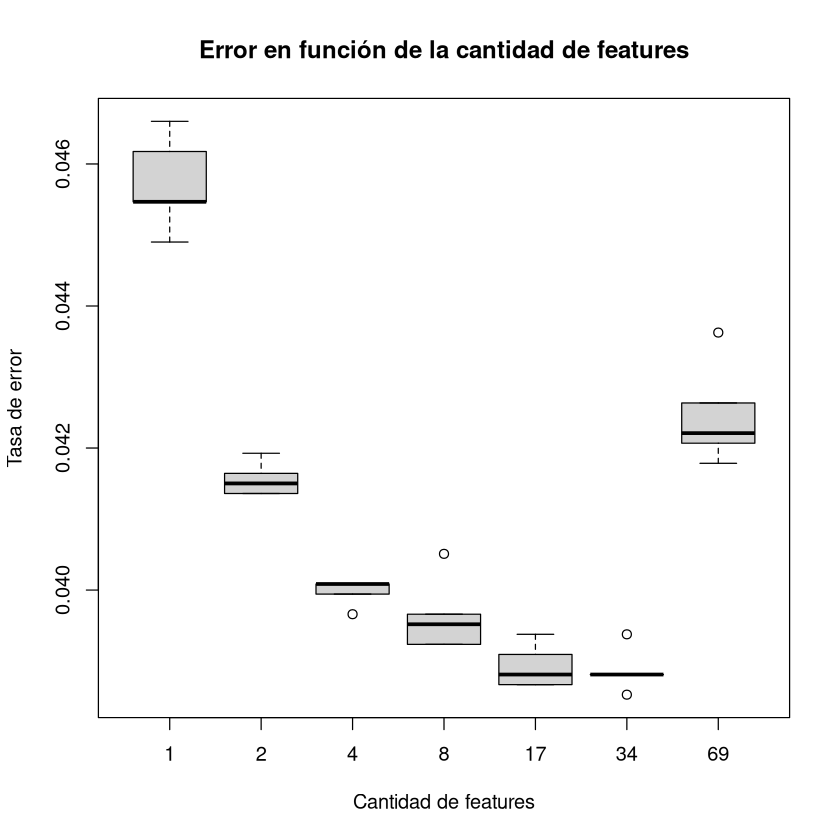

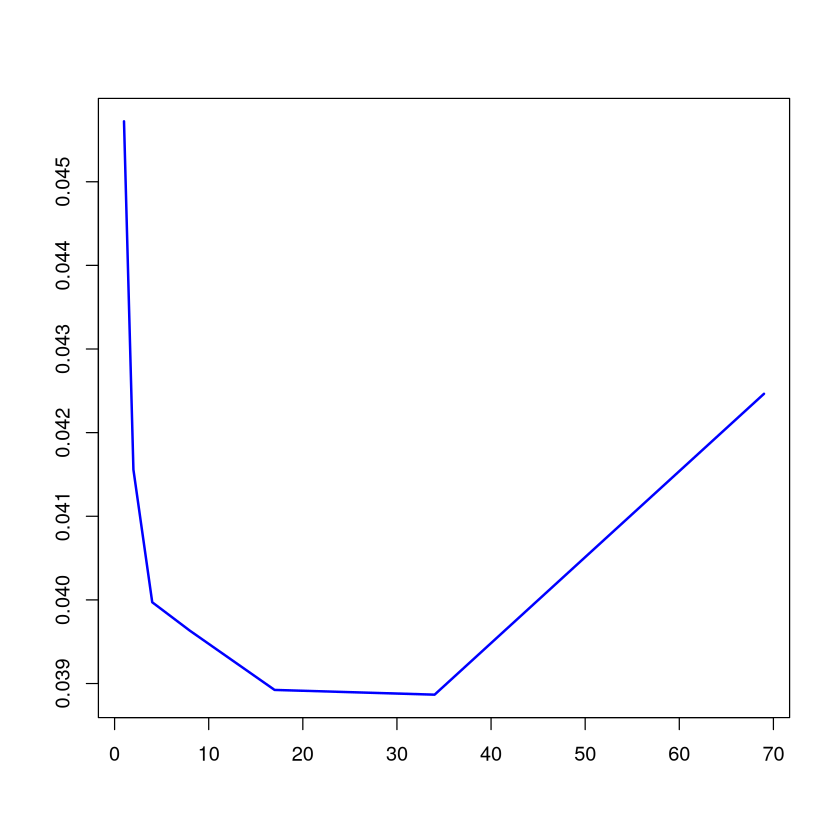

In [44]:
summary(error)
error.means <- colMeans(error)
cat(error.means)
boxplot(error, xlab="Cantidad de features", ylab="Tasa de error", main="Error en función de la cantidad de features")

plot(iters, error.means, type = "l", col = "blue", lwd = 2, xlab = "", ylab = "")

### Conclusiones

Lo que se observa es que aumentar la cantidad de características es útil hasta 32, luego de esto el error no decrece sino que aumenta.

## 3. Datos Anchos

El dataset sobre el que se trabaja es Lampone

In [114]:
lampone.y <- lampone[,143]

lampone.x <- lampone[,-c(1,143,144)]

# hay columnas que no son numéricas molestando, las borro
columnas_numericas <- sapply(lampone.x, is.numeric)
lampone.x <- lampone.x[,columnas_numericas]

# Eliminar variables constantes
lampone.x <- lampone.x[, sapply(lampone.x, function(col) length(unique(col)) > 1)]
summary(lampone.x)

      m33              m34              m35             m36         
 Min.   : 13.31   Min.   :0.1600   Min.   :0.020   Min.   :0.00000  
 1st Qu.: 37.70   1st Qu.:0.3900   1st Qu.:0.060   1st Qu.:0.01000  
 Median : 63.97   Median :0.6500   Median :0.110   Median :0.01000  
 Mean   : 69.47   Mean   :0.7751   Mean   :0.132   Mean   :0.01143  
 3rd Qu.: 80.30   3rd Qu.:0.9800   3rd Qu.:0.170   3rd Qu.:0.01000  
 Max.   :255.31   Max.   :2.9500   Max.   :0.540   Max.   :0.02000  
      m41              m42               m43             m44        
 Min.   :0.0600   Min.   :0.01000   Min.   : 1.49   Min.   :0.0900  
 1st Qu.:0.1400   1st Qu.:0.02000   1st Qu.: 5.45   1st Qu.:0.2400  
 Median :0.2500   Median :0.03000   Median :10.42   Median :0.3100  
 Mean   :0.2818   Mean   :0.03449   Mean   :15.09   Mean   :0.4178  
 3rd Qu.:0.3700   3rd Qu.:0.04000   3rd Qu.:22.01   3rd Qu.:0.6200  
 Max.   :0.7800   Max.   :0.07000   Max.   :68.06   Max.   :1.6300  
      m45             m46         

### Random Forest (RandomForest)

En este caso los para metros que tenemos para ajustar son:

+ **Número de árboles**: Mientras sean muchos no es un problema, en este caso voy a tomar `1500`
+ **Cantidad de variables Seleccionadas**: El número que suele ser *bueno* es $\sqrt{p}$ donde $p$ es el número de variables totales pero voy a probar un par más.

features,error
<dbl>,<dbl>
2,0.10204082
4,0.10204082
8,0.10204082
11,0.10204082
16,0.08163265
32,0.08163265
64,0.14285714
126,0.16326531


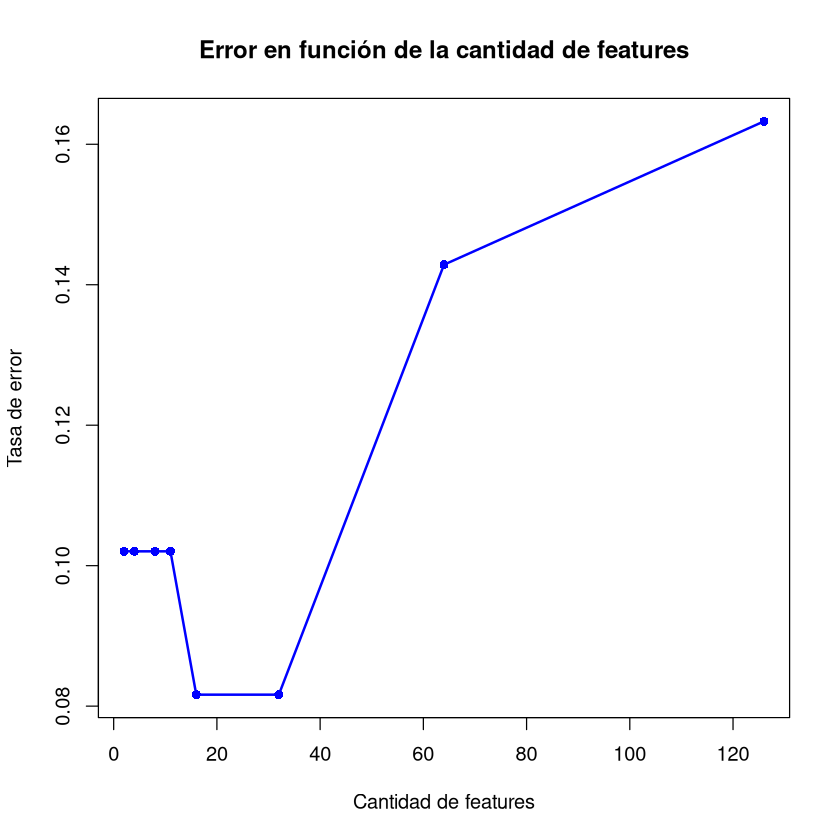

In [116]:
# Parámetros
nroArboles <- 1500
features <- sort(c(floor(sqrt(dim(lampone.x)[2])), 2, 4, 8, 16, 32, 64, 126))

error <- numeric(length(features))

for (i in 1:length(features)){
    # Modelo
    lampone.m.rf <- randomForest(x=lampone.x, y=lampone.y, ntree=nroArboles, mtry=features[i])

    # Calculo del error
    error[i] <- lampone.m.rf$err.rate[nrow(lampone.m.rf$err.rate), "OOB"]
}

df.error <- data.frame(features, error)
df.error

plot(x=features, y=error, type="l", col="blue", lwd=2, xlab="Cantidad de features", ylab="Tasa de error", main="Error en función de la cantidad de features")
points(features, error, col = "blue", pch = 16)

### xgboost (xgboost)

Para este caso los parametros a ajustar son:
+ **T**: El cual representa cuantas iteraciones vamos a hacer. Lo voy a dejar ir hasta el final con 100.

Una observación es que no hay conjunto de test. Como son pocos datos hacer un sample y crear dos subconjuntos, uno para entrenar y el otro para testear, dejaría pocos puntos para las tareas. Como contra medida utilizare *folds*, en particulas voy a usar 5.

In [117]:
library(caret)

k_folds <- 5

lampone.folds <- createFolds(t(lampone.y), k=k_folds)

El menor error cometido es:  0.1927273 con una profundidad de:  3

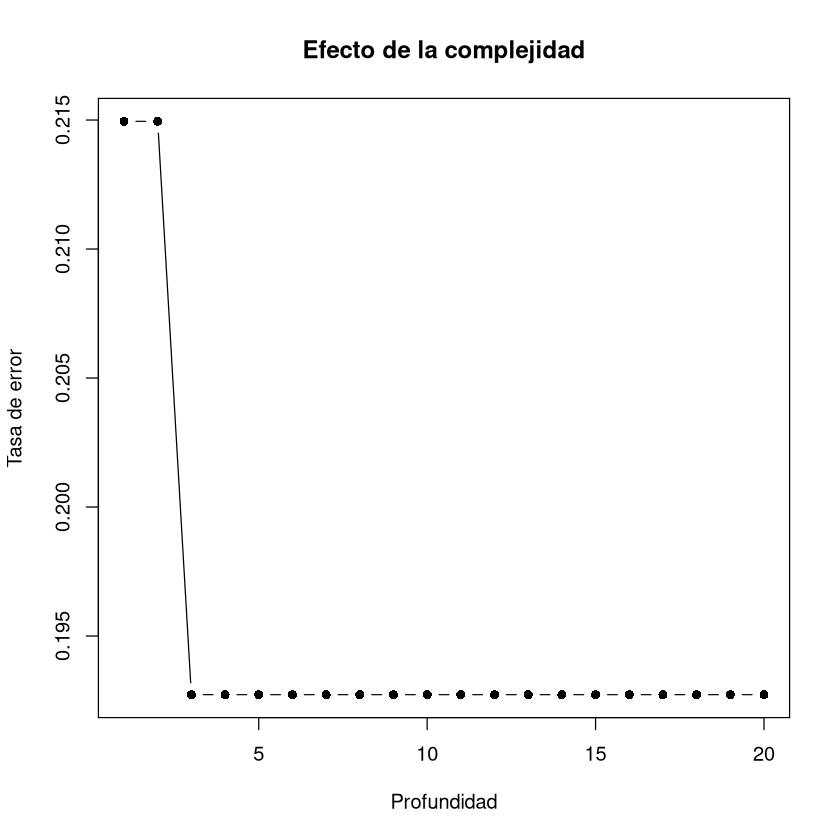

In [118]:
error <- numeric(20)

XGB.nrounds=100 #total de arboles/ciclos
XGB.eta=0.1     #learning rate, similar a redes

for (profundidad in 1:20) {
    error.mean <- numeric(k_folds)
    XGB.max.depth=profundidad #profundidad maxima de los arboles, complejidad
    for (i in 1:k_folds) {

        x.train <- as.matrix(lampone.x[unlist(lampone.folds[-i]),])
        y.train <- lampone.y[unlist(lampone.folds[-i])]

        x.test <- as.matrix(lampone.x[unlist(lampone.folds[i]),])
        y.test <- lampone.y[unlist(lampone.folds[i])]
        m.xgb <- xgboost(data=x.train, label=as.integer(y.train)-1, objective="binary:hinge", nrounds=XGB.nrounds, eta=XGB.eta, max.depth=XGB.max.depth, verbose = 0, nthread=4)

        # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
        y.pred <- predict(m.xgb, x.test)
        # Calcula la tasa de error (porcentaje de predicciones incorrectas)
        error.mean[i] <- mean(y.pred != as.integer(y.test)-1)

    }
    error[profundidad] <- mean(error.mean)
}
plot(1:20, error, type="b", pch=16, xlab="Profundidad", ylab="Tasa de error", main="Efecto de la complejidad")
cat("El menor error cometido es: ", min(error), "con una profundidad de: ", which.min(error))

### Support-vector machines (e1071)

#### Kernel Polinómico

In [125]:
error <- numeric(k_folds)

for (i in 1:k_folds) {
    
    x.train <- as.matrix(lampone.x[unlist(lampone.folds[-i]),])
    y.train <- lampone.y[unlist(lampone.folds[-i])]

    x.test <- as.matrix(lampone.x[unlist(lampone.folds[i]),])
    y.test <- lampone.y[unlist(lampone.folds[i])]

    m.svm<-svm(x=x.train, y = factor(y.train), type = 'C-classification', kernel = "polynomial", cost=1, )

    # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
    y.pred <- predict(m.svm, x.test)
    # Calcula la tasa de error (porcentaje de predicciones incorrectas)
    error[i] <- mean(y.pred != y.test)

}

cat("El error es:", mean(error))


Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m140’ and ‘m187’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m110’ and ‘m132’ and ‘m163’ and ‘m173’ and ‘m183’ and ‘m191’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m146’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m130’ constant. Cannot scale data.”


El error es: 0.2634343

#### Kernel RBF (Radial basis function)

In [126]:
error <- numeric(k_folds)

for (i in 1:k_folds) {
    
    x.train <- as.matrix(lampone.x[unlist(lampone.folds[-i]),])
    y.train <- lampone.y[unlist(lampone.folds[-i])]

    x.test <- as.matrix(lampone.x[unlist(lampone.folds[i]),])
    y.test <- lampone.y[unlist(lampone.folds[i])]

    m.svm<-svm(x=x.train, y = factor(y.train), type = 'C-classification', kernel = "radial", cost=1)

    # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
    y.pred <- predict(m.svm, x.test)
    # Calcula la tasa de error (porcentaje de predicciones incorrectas)
    error[i] <- mean(y.pred != y.test)

}

cat("El error es:", mean(error))

Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m140’ and ‘m187’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m110’ and ‘m132’ and ‘m163’ and ‘m173’ and ‘m183’ and ‘m191’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m146’ constant. Cannot scale data.”
Warning message in svm.default(x = x.train, y = factor(y.train), type = "C-classification", :
“Variable(s) ‘m130’ constant. Cannot scale data.”


El error es: 0.400202

### Cierre

Luego de aplicar los 3 métodos y sus variantes los resultados obtenidos indican que **random forest** es el que mejor realiza la tarea con un error del *0.08163265*. El resto de los métodos no distan tanto, salvo por SVM con kernel RBF el cual tiene un error del *0.4*.

## 4. Opcional (pero interesante)

In [4]:
summary(RRL)
dim(RRL)

   Amplitude       AndersonDarling  Autocor_length    Beyond1Std      
 Min.   :0.01550   Min.   :0.1237   Min.   :1.000   Min.   :0.007143  
 1st Qu.:0.09469   1st Qu.:0.9474   1st Qu.:1.000   1st Qu.:0.228361  
 Median :0.14950   Median :1.0000   Median :1.000   Median :0.271930  
 Mean   :0.15444   Mean   :0.9109   Mean   :1.252   Mean   :0.258909  
 3rd Qu.:0.19300   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:0.307295  
 Max.   :1.57950   Max.   :1.0000   Max.   :7.000   Max.   :0.638060  
    CAR_mean          CAR_sigma            CAR_tau             Con           
 Min.   :     0.0   Min.   :-57.33259   Min.   :      0   Min.   :0.0000000  
 1st Qu.:    24.0   1st Qu.: -0.16407   1st Qu.:      0   1st Qu.:0.0000000  
 Median :    27.5   Median :  0.00000   Median :      1   Median :0.0000000  
 Mean   :  9695.5   Mean   :  0.45900   Mean   :   7144   Mean   :0.0004529  
 3rd Qu.:   149.2   3rd Qu.:  0.00459   3rd Qu.:      1   3rd Qu.:0.0000000  
 Max.   :773430.0   Max.   :208.874

[1] 7060   70

In [7]:
RRL.x <- RRL[,-70]
RRL.y <- RRL[,70]

k_folds <- 5

library(caret)
RRL.folds <- createFolds(t(RRL.y), k=k_folds)

### Random Forest

1  2  3  4  5  6  7  8  

Warning message in randomForest.default(x = RRL.x, y = RRL.y, ntree = nroArboles, :
“invalid mtry: reset to within valid range”



El error es:

features,error
<dbl>,<dbl>
2,0.04164306
4,0.03951841
8,0.03937677
8,0.03966006
16,0.03838527
32,0.03923513
64,0.04305949
70,0.04220963


El mínimo es  0.03838527 con  16 features

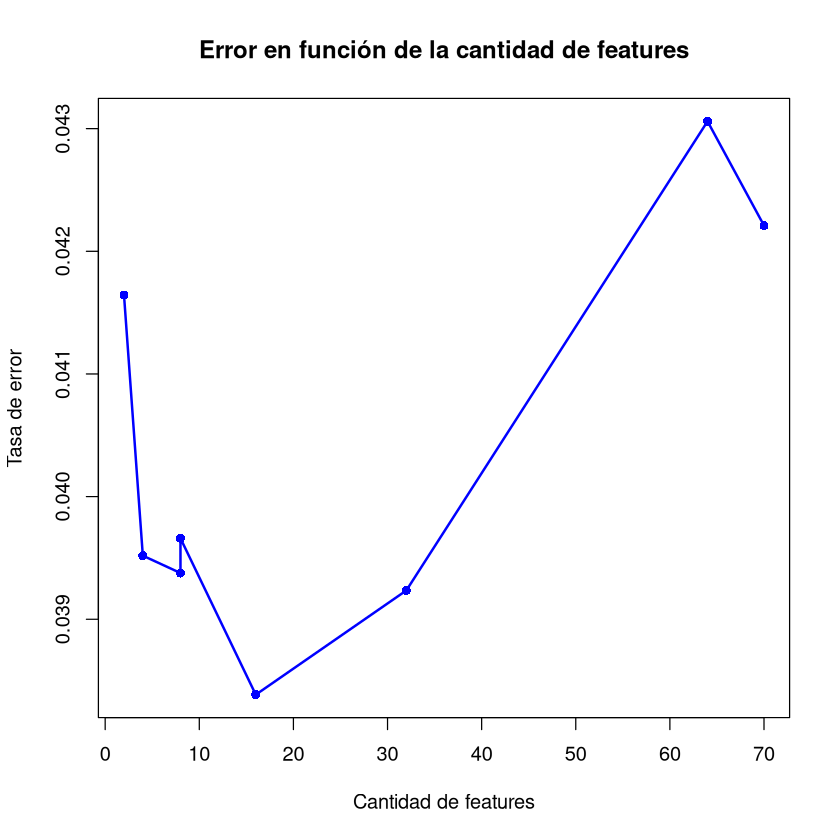

In [8]:
# Parámetros
nroArboles <- 1500
features <- sort(c(floor(sqrt(dim(RRL.x)[2])), 2, 4, 8, 16, 32, 64, 69))

error <- numeric(length(features))

for (i in 1:length(features)){
    cat(i, " ")
    flush.console()

    # Modelo
    RRL.m.rf <- randomForest(x=RRL.x, y=RRL.y, ntree=nroArboles, mtry=features[i], nthreads = 4)

    # Calculo del error
    error[i] <- RRL.m.rf$err.rate[nrow(RRL.m.rf$err.rate), "OOB"]
}
cat("\n")

df.error <- data.frame(features, error)

cat("El error es:")
df.error
cat("El mínimo es ", min(error), "con ", features[which.min(error)], "features")

plot(x=features, y=error, type="l", col="blue", lwd=2, xlab="Cantidad de features", ylab="Tasa de error", main="Error en función de la cantidad de features")
points(features, error, col = "blue", pch = 16)

### xgboost

In [ ]:
error <- numeric(20)

XGB.nrounds=100 #total de arboles/ciclos
XGB.eta=0.1     #learning rate, similar a redes

for (profundidad in 1:20) {

    cat(profundidad, " ")
    flush.console()

    error.mean <- numeric(k_folds)
    XGB.max.depth=profundidad #profundidad maxima de los arboles, complejidad
    for (i in 1:k_folds) {

        x.train <- as.matrix(RRL.x[unlist(RRL.folds[-i]),])
        y.train <- RRL.y[unlist(RRL.folds[-i])]

        x.test <- as.matrix(RRL.x[unlist(RRL.folds[i]),])
        y.test <- RRL.y[unlist(RRL.folds[i])]
        
        m.xgb <- xgboost(data=x.train, label=as.integer(y.train)-1, objective="binary:hinge", nrounds=XGB.nrounds, eta=XGB.eta, max.depth=XGB.max.depth, verbose = 0, nthread=4)

        # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
        y.pred <- predict(m.xgb, x.test)
        # Calcula la tasa de error (porcentaje de predicciones incorrectas)
        error.mean[i] <- mean(y.pred != as.integer(y.test)-1)

    }
    error[profundidad] <- mean(error.mean)
}

cat("\n")

plot(1:20, error, type="b", pch=16, xlab="Profundidad", ylab="Tasa de error", main="Efecto de la complejidad")
cat("El menor error cometido es: ", min(error), "con una profundidad de: ", which.min(error))

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
El menor error cometido es:  0.04065156 con una profundidad de:  3

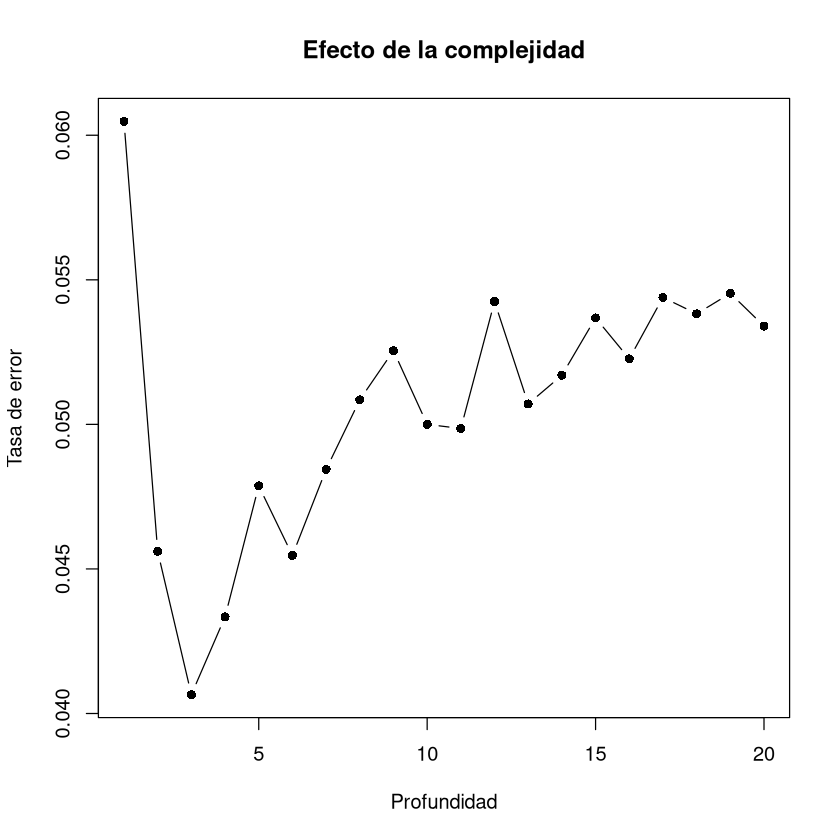

In [11]:
error <- numeric(20)

XGB.nrounds=100 #total de arboles/ciclos
XGB.eta=0.1     #learning rate, similar a redes

for (profundidad in 1:20) {

    cat(profundidad, " ")
    flush.console()

    error.mean <- numeric(k_folds)
    XGB.max.depth=profundidad #profundidad maxima de los arboles, complejidad
    for (i in 1:k_folds) {

        x.train <- as.matrix(RRL.x[unlist(RRL.folds[-i]),])
        y.train <- RRL.y[unlist(RRL.folds[-i])]

        x.test <- as.matrix(RRL.x[unlist(RRL.folds[i]),])
        y.test <- RRL.y[unlist(RRL.folds[i])]
        
        m.xgb <- xgboost(data=x.train, label=as.integer(y.train)-1, objective="binary:hinge", nrounds=XGB.nrounds, eta=XGB.eta, max.depth=XGB.max.depth, verbose = 0, nthread=4)

        # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
        y.pred <- predict(m.xgb, x.test)
        # Calcula la tasa de error (porcentaje de predicciones incorrectas)
        error.mean[i] <- mean(y.pred != as.integer(y.test)-1)

    }
    error[profundidad] <- mean(error.mean)
}

cat("\n")

plot(1:20, error, type="b", pch=16, xlab="Profundidad", ylab="Tasa de error", main="Efecto de la complejidad")
cat("El menor error cometido es: ", min(error), "con una profundidad de: ", which.min(error))

### Support vector machines

#### Polinómico

In [12]:
error <- numeric(k_folds)

for (i in 1:k_folds) {
    
    x.train <- as.matrix(RRL.x[unlist(RRL.folds[-i]),])
    y.train <- RRL.y[unlist(RRL.folds[-i])]

    x.test <- as.matrix(RRL.x[unlist(RRL.folds[i]),])
    y.test <- RRL.y[unlist(RRL.folds[i])]

    m.svm<-svm(x=x.train, y = factor(y.train), type = 'C-classification', kernel = "polynomial", cost=1)

    # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
    y.pred <- predict(m.svm, x.test)
    # Calcula la tasa de error (porcentaje de predicciones incorrectas)
    error[i] <- mean(y.pred != y.test)

}

cat("El error es:", mean(error))


El error es: 0.1135977

#### Kernel RBF

In [13]:
error <- numeric(k_folds)

for (i in 1:k_folds) {
    
    x.train <- as.matrix(RRL.x[unlist(RRL.folds[-i]),])
    y.train <- RRL.y[unlist(RRL.folds[-i])]

    x.test <- as.matrix(RRL.x[unlist(RRL.folds[i]),])
    y.test <- RRL.y[unlist(RRL.folds[i])]

    m.svm<-svm(x=x.train, y = factor(y.train), type = 'C-classification', kernel = "radial", cost=1)

    # Usa el modelo m.xgb para predecir los valores en el conjunto de prueba
    y.pred <- predict(m.svm, x.test)
    # Calcula la tasa de error (porcentaje de predicciones incorrectas)
    error[i] <- mean(y.pred != y.test)

}

cat("El error es:", mean(error))

El error es: 0.08626062

### Comparación entre los métodos

En este caso el método random forest sigue siendo el que mejor desempeño tiene con el error más bajo. Aunque hay que notar que los resultados del resto son muy similares.